In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("HR_comma_sep.csv")

#Evaluting the Left VS Retained

In [8]:
left = df[df.left==1]
retained = df[df.left==0]

In [16]:
print("The total number of employeed on record is", df.size)

The total number of employeed on record is 149990


In [14]:
print("The numer of people who left the organization is", left.size)

The numer of people who left the organization is 35710


In [15]:
print("The numer of people who were retained by the organization is", retained.size)

The numer of people who were retained by the organization is 114280


#Mean of all values

In [24]:
df.groupby('left').mean()

<ipython-input-24-b0959f325c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#Salary VS Retention

In [25]:
import matplotlib.pyplot as plt

In [31]:
z = pd.crosstab(df['salary'],df['left'])
z

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

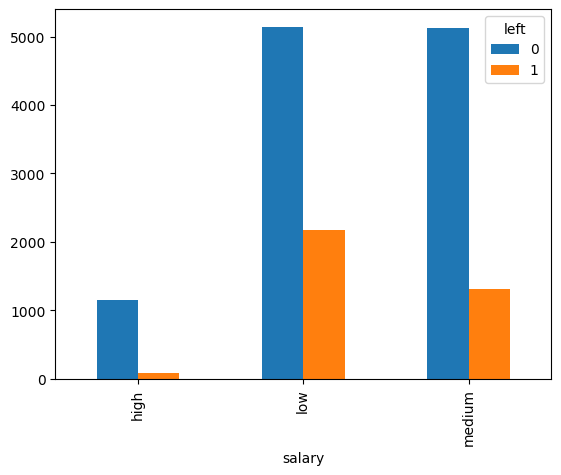

In [33]:
z.plot(kind='bar')

#Department-wise Retention

In [62]:
z = pd.crosstab(df['Department'],df['left'])
z

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='Department'>

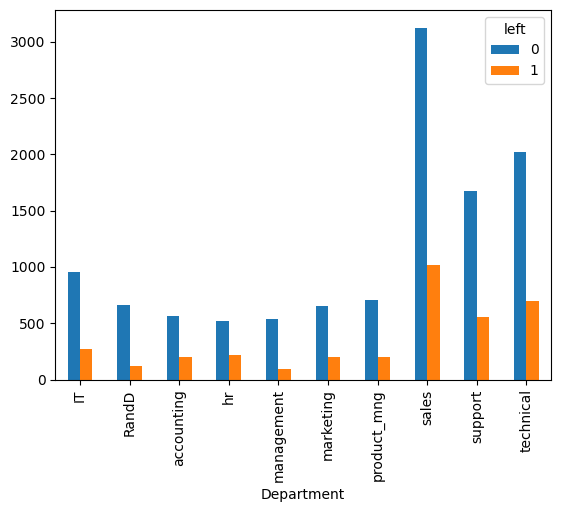

In [63]:
z.plot(kind="bar")

#Conclusion -
1. We Salary, Promotion, Avg Monthly Hours and Satisfaction as the prime factors for employee retention
2. Department doesn't play a big role
3. Work Accident and Last Assessment haven't been taken into account

In [64]:
sub_df= df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
sub_df.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
5,0.41,153,0,low
6,0.10,247,0,low
7,0.92,259,0,low
8,0.89,224,0,low
9,0.42,142,0,low


In [70]:
sal_dum = pd.get_dummies(sub_df['salary'])

In [72]:
merged = pd.concat([sal_dum,sub_df],axis=1)

In [76]:
final = merged.drop(['salary'],axis = 1)

In [81]:
X = final
y = df['left']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [84]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [86]:
reg.fit(X_train,y_train)

LogisticRegression()

In [87]:
reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
print("The Accuracy of our model is",reg.score(X_test,y_test)*100,"%")

The Accuracy of our model is 76.7 %
